## Task 7 
- Get Basic Sales Summary from a Tiny SQLite Database using Python
### Objective: 
- Use SQL inside Python to pull simple sales info (like total quantity sold, total revenue), and display it using basic print statements and a simple bar chart.
### Tools:
- Python (with sqlite3, pandas, matplotlib)
- SQLite (built into Python — no setup!)
- Jupyter Notebook or a .py file

### 1. Import Libraries and Connect to DB

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

con = sqlite3.connect('data/Pizza_Sales.db')

### 2. Load Full Data

In [3]:
df = pd.read_sql_query('SELECT * FROM sales', con)
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01 00:00:00,11:38:36.000000,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01 00:00:00,11:57:40.000000,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01 00:00:00,11:57:40.000000,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01 00:00:00,11:57:40.000000,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01 00:00:00,11:57:40.000000,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


### 3. Total quantity and revenue by pizza category

In [25]:
query1 = '''
        SELECT pizza_category, SUM(quantity) AS total_quantity, SUM(total_price) AS total_revenue
        FROM sales
        GROUP BY pizza_category
        ORDER BY total_quantity DESC
        '''
        
df_q1 = pd.read_sql_query(query1,con)

print(f'Pizza Sales Summary by Category:\n {df_q1}')


Pizza Sales Summary by Category:
   pizza_category  total_quantity  total_revenue
0        Classic           14888      220053.10
1        Supreme           11987      208197.00
2         Veggie           11649      193690.45
3        Chicken           11050      195919.50


#### 3.1. Total Revenue by Pizza Category

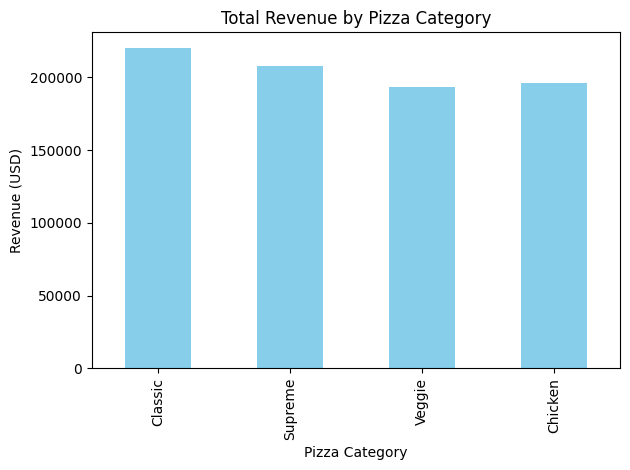

In [39]:
df_q1.plot(kind='bar', x='pizza_category', y='total_revenue', legend=False, color='skyblue')
plt.title("Total Revenue by Pizza Category")
plt.xlabel("Pizza Category")
plt.ylabel("Revenue (USD)")
plt.tight_layout()
plt.show()

#### 3.2. Total Quantity by Pizza Category

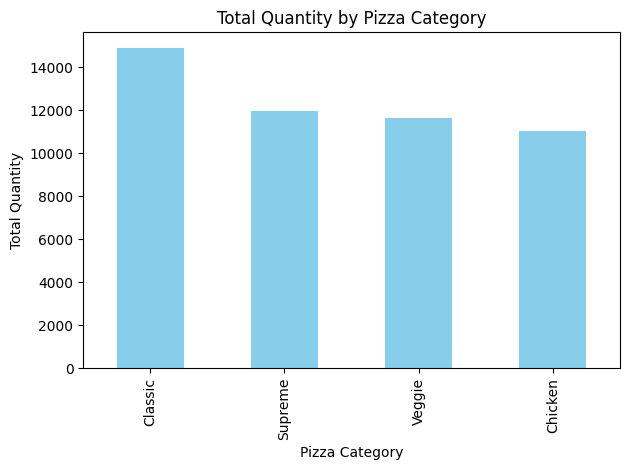

In [38]:
df_q1.plot(kind='bar', x='pizza_category', y='total_quantity', legend=False, color='skyblue')
plt.title("Total Quantity by Pizza Category")
plt.xlabel("Pizza Category")
plt.ylabel("Total Quantity")
plt.tight_layout()
plt.show()

### 4. Average Order Price by Pizza Category

In [26]:
query2 = '''
        SELECT pizza_category, ROUND(AVG(total_price), 2) AS avg_order_price
        FROM sales
        GROUP BY pizza_category
        '''
        
df_q2 = pd.read_sql_query(query2,con)
print(f'Average Order Price by Pizza Category:\n {df_q2}')

Average Order Price by Pizza Category:
   pizza_category  avg_order_price
0        Chicken            18.12
1        Classic            15.09
2        Supreme            17.68
3         Veggie            16.92


### 5. Total quantity sold by pizza size

In [27]:
query3 = '''
        SELECT pizza_size, SUM(quantity) AS total_quantity
        FROM sales
        GROUP BY pizza_size
        '''

df_q3 = pd.read_sql_query(query3,con)
print(f'Total Quantity Sold by Pizza Size:\n {df_q3}')

Total Quantity Sold by Pizza Size:
   pizza_size  total_quantity
0          L           18956
1          M           15635
2          S           14403
3         XL             552
4        XXL              28


#### 5.1 bar plot

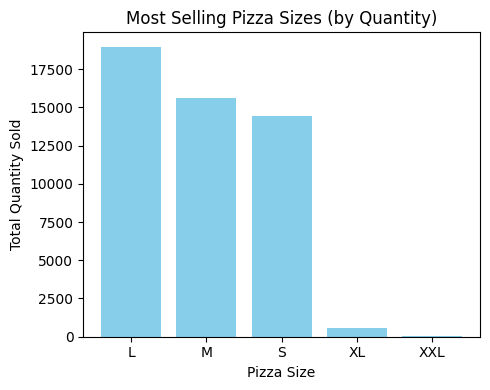

In [37]:
plt.figure(figsize=(5,4))
plt.bar(df_q3['pizza_size'], df_q3['total_quantity'], color='skyblue')
plt.title("Most Selling Pizza Sizes (by Quantity)")
plt.xlabel("Pizza Size")
plt.ylabel("Total Quantity Sold")
plt.tight_layout()
plt.show()

In [42]:
query_peak_time = """
SELECT 
    order_time,
    ROUND(AVG(quantity), 2) AS avg_quantity_per_order
FROM sales
GROUP BY order_time
ORDER BY avg_quantity_per_order DESC
"""
df_q5 = pd.read_sql_query(query_peak_time, con)

print("⏰ Average Quantity per Order by Time (Most Crowded Times First):\n")
print(df_q5.head())


⏰ Average Quantity per Order by Time (Most Crowded Times First):

        order_time  avg_quantity_per_order
0  22:16:05.000000                     2.0
1  21:26:50.000000                     2.0
2  21:26:33.000000                     2.0
3  21:16:58.000000                     2.0
4  21:12:23.000000                     2.0
